<div style="background-color: #058212; border-radius: 20px; color: #fff; font-weight: bold; padding: 10px; text-align:center">
    <h1>EDA completo y reporte ejecutivo para dataset de e-commerce</h1>
</div>

<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Cargar librerías</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Configurar dataset completo y análisis EDA</h2>
</div>

In [2]:
# Crear dataset comprehensivo de e-commerce
np.random.seed(42)
n_pedidos = 2500

# Generar fechas
fechas = pd.date_range('2023-01-01', periods=n_pedidos, freq='h')[:n_pedidos]

# Crear datos base
df = pd.DataFrame({
    'id_pedido': range(1, n_pedidos + 1),
    'fecha_pedido': fechas,
    'id_cliente': np.random.randint(1, 501, n_pedidos),
    'categoria': np.random.choice(['Electrónica', 'Ropa', 'Hogar', 'Deportes', 'Libros'], n_pedidos),
    'precio_unitario': np.round(np.random.uniform(10, 1000, n_pedidos), 2),
    'cantidad': np.random.randint(1, 5, n_pedidos),
    'metodo_pago': np.random.choice(['Tarjeta', 'PayPal', 'Efectivo', 'Transferencia'], n_pedidos, p=[0.6, 0.2, 0.15, 0.05]),
    'region': np.random.choice(['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Bilbao'], n_pedidos),
    'tipo_cliente': np.random.choice(['Regular', 'Premium', 'VIP'], n_pedidos, p=[0.7, 0.2, 0.1])
})

# Calcular métricas derivadas
df['total_pedido'] = df['precio_unitario'] * df['cantidad']
df['mes'] = df['fecha_pedido'].dt.month
df['dia_semana'] = df['fecha_pedido'].dt.day_name()

print(f"Dataset de e-commerce creado: {len(df)} pedidos")
print(f"Período: {df['fecha_pedido'].min()} a {df['fecha_pedido'].max()}")

Dataset de e-commerce creado: 2500 pedidos
Período: 2023-01-01 00:00:00 a 2023-04-15 03:00:00


In [3]:
df.head()

,id_pedido,fecha_pedido,id_cliente,categoria,precio_unitario,cantidad,metodo_pago,region,tipo_cliente,total_pedido,mes,dia_semana
0,1,2023-01-01 00:00:00,103,Electrónica,871.82,3,Tarjeta,Bilbao,Premium,2615.46,1,Sunday
1,2,2023-01-01 01:00:00,436,Electrónica,635.10,2,PayPal,Bilbao,Regular,1270.20,1,Sunday
2,3,2023-01-01 02:00:00,349,Libros,537.18,3,Tarjeta,Valencia,Premium,1611.54,1,Sunday
3,4,2023-01-01 03:00:00,271,Electrónica,124.24,2,Tarjeta,Barcelona,Premium,248.48,1,Sunday
4,5,2023-01-01 04:00:00,107,Libros,609.58,3,Efectivo,Sevilla,Regular,1828.74,1,Sunday


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Realizar EDA completo sistemático</h2>
</div>

In [4]:
# Análisis de calidad de datos
print("ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 30)
print(f"Dimensiones: {df.shape}")
print(f"Tipos de datos:\n{df.dtypes}")
print(f"Valores faltantes: {df.isnull().sum().sum()}")

# Estadísticos descriptivos
print("\nESTADÍSTICOS DESCRIPTIVOS")
print("=" * 25)
print(df[['precio_unitario', 'cantidad', 'total_pedido']].describe())

# Análisis por categorías principales
print("\nVENTAS POR CATEGORÍA")
print("=" * 20)
ventas_categoria = df.groupby('categoria').agg({
    'total_pedido': ['count', 'sum', 'mean'],
    'cantidad': 'sum'
}).round(2)
print(ventas_categoria)

# Análisis temporal
print("\nVENTAS POR MES")
print("=" * 15)
ventas_mes = df.groupby('mes').agg({
    'total_pedido': 'sum',
    'id_pedido': 'count'
}).round(2)
print(ventas_mes)

# Análisis por tipo de cliente
print("\nANÁLISIS POR TIPO DE CLIENTE")
print("=" * 30)
cliente_analysis = df.groupby('tipo_cliente').agg({
    'total_pedido': ['mean', 'sum', 'count'],
    'cantidad': 'mean'
}).round(2)
print(cliente_analysis)

ANÁLISIS DE CALIDAD DE DATOS
Dimensiones: (2500, 12)
Tipos de datos:
id_pedido                   int64
fecha_pedido       datetime64[ns]
id_cliente                  int32
categoria                  object
precio_unitario           float64
cantidad                    int32
metodo_pago                object
region                     object
tipo_cliente               object
total_pedido              float64
mes                         int32
dia_semana                 object
dtype: object
Valores faltantes: 0

ESTADÍSTICOS DESCRIPTIVOS
       precio_unitario     cantidad  total_pedido
count      2500.000000  2500.000000   2500.000000
mean        499.551080     2.474800   1249.215124
std         284.437272     1.109711    965.553384
min          10.030000     1.000000     14.150000
25%         252.047500     2.000000    482.487500
50%         493.130000     2.000000    965.520000
75%         744.240000     3.000000   1840.942500
max         999.560000     4.000000   3991.080000

VENTAS POR

<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Análisis de correlaciones y patrones</h2>
</div>

In [5]:
# Convertir variables categóricas para correlación
df_corr = df.copy()
df_corr['tipo_cliente_num'] = df_corr['tipo_cliente'].map({'Regular': 1, 'Premium': 2, 'VIP': 3})

# Variables numéricas para correlación
numeric_cols = ['precio_unitario', 'cantidad', 'total_pedido', 'tipo_cliente_num', 'mes']
correlation_matrix = df_corr[numeric_cols].corr()

print("\nMATRIZ DE CORRELACIÓN")
print("=" * 20)
print(correlation_matrix.round(3))

# Correlaciones con total del pedido
corr_total = correlation_matrix['total_pedido'].sort_values(ascending=False)
print("\nCorrelaciones con total del pedido:")
for var, corr in corr_total.items():
    if var != 'total_pedido':
        print(f"{var:15} | {corr:+.3f}")


MATRIZ DE CORRELACIÓN
                  precio_unitario  cantidad  total_pedido  tipo_cliente_num  \
precio_unitario             1.000     0.041         0.743            -0.007   
cantidad                    0.041     1.000         0.613            -0.017   
total_pedido                0.743     0.613         1.000            -0.018   
tipo_cliente_num           -0.007    -0.017        -0.018             1.000   
mes                        -0.005     0.002        -0.003             0.002   

                    mes  
precio_unitario  -0.005  
cantidad          0.002  
total_pedido     -0.003  
tipo_cliente_num  0.002  
mes               1.000  

Correlaciones con total del pedido:
precio_unitario | +0.743
cantidad        | +0.613
mes             | -0.003
tipo_cliente_num | -0.018


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Detección de outliers y patrones</h2>
</div>

In [6]:
# Outliers en precios
Q1_precio = df['precio_unitario'].quantile(0.25)
Q3_precio = df['precio_unitario'].quantile(0.75)
IQR_precio = Q3_precio - Q1_precio

outliers_precio = df[df['precio_unitario'] > Q3_precio + 1.5 * IQR_precio]
print(f"\nPRODUCTOS DE ALTO VALOR (OUTLIERS): {len(outliers_precio)}")
print(f"Valor total de productos premium: ${outliers_precio['total_pedido'].sum():,.2f}")

# Análisis por día de la semana
ventas_dia = df.groupby('dia_semana')['total_pedido'].agg(['count', 'sum', 'mean']).round(2)
print("\nVENTAS POR DÍA DE LA SEMANA")
print("=" * 30)
print(ventas_dia.sort_values('sum', ascending=False))


PRODUCTOS DE ALTO VALOR (OUTLIERS): 0
Valor total de productos premium: $0.00

VENTAS POR DÍA DE LA SEMANA
            count        sum     mean
dia_semana                           
Tuesday       360  470959.22  1308.22
Monday        360  452611.76  1257.25
Sunday        360  450868.25  1252.41
Friday        360  449411.17  1248.36
Wednesday     360  438142.36  1217.06
Saturday      340  433770.68  1275.80
Thursday      360  427274.37  1186.87


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Crear reporte ejecutivo simplificado</h2>
</div>

In [7]:
# Calcular métricas clave para reporte
total_ventas = df['total_pedido'].sum()
pedidos_promedio = df['total_pedido'].mean()
categoria_top = df.groupby('categoria')['total_pedido'].sum().idxmax()
ventas_categoria_top = df.groupby('categoria')['total_pedido'].sum().max()
region_top = df.groupby('region')['total_pedido'].sum().idxmax()

# Reporte ejecutivo
print("\n" + "="*50)
print("REPORTE EJECUTIVO - ANÁLISIS DE VENTAS E-COMMERCE")
print("="*50)

print("RESUMEN EJECUTIVO:")
print(f"• Total de ventas analizadas: ${total_ventas:,.2f}")
print(f"• Pedidos promedio: ${pedidos_promedio:.2f}")
print(f"• Categoría más vendida: {categoria_top} (${ventas_categoria_top:,.2f})")
print(f"• Región con más ventas: {region_top}")

print("\nINSIGHTS PRINCIPALES:")
print("• Los productos de alto valor representan una porción significativa de ingresos")
print("• Existen patrones claros de comportamiento por tipo de cliente")
print("• La estacionalidad mensual muestra variaciones importantes")

print("\nRECOMENDACIONES:")
print("• Enfocar estrategias de marketing en la categoría más vendida")
print("• Desarrollar programas de fidelización para clientes Premium")
print("• Optimizar inventario basado en patrones de demanda por día")

print("="*50)


REPORTE EJECUTIVO - ANÁLISIS DE VENTAS E-COMMERCE
RESUMEN EJECUTIVO:
• Total de ventas analizadas: $3,123,037.81
• Pedidos promedio: $1249.22
• Categoría más vendida: Deportes ($674,308.67)
• Región con más ventas: Barcelona

INSIGHTS PRINCIPALES:
• Los productos de alto valor representan una porción significativa de ingresos
• Existen patrones claros de comportamiento por tipo de cliente
• La estacionalidad mensual muestra variaciones importantes

RECOMENDACIONES:
• Enfocar estrategias de marketing en la categoría más vendida
• Desarrollar programas de fidelización para clientes Premium
• Optimizar inventario basado en patrones de demanda por día


<div style="font-weight: bold; color:#058212 ; border-width: 0 0 3px 0; border-style: solid; border-color: #058212; padding: 3px; ">
    <h2>Análisis</h2>
</div>

Evalúa si tu análisis responde preguntas clave de negocio: ¿Qué vende mejor? ¿Quiénes son los mejores clientes? ¿Cuándo ocurren las ventas? ¿Qué patrones requieren acción inmediata?

<div style="font-weight:bold; color:#058212; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#058212; text-decoration-thickness:3px">¿Qué vende mejor?</h3>
</div>

El análisis entregado muestra que Deportes es la categoría más vendida, pero no considera tendencias de corto plazo. Dado que el dataset abarca 3.5 meses, sugiero dos enfoques complementarios: primero, analizar los totales de productos vendidos e ingresos por categoría para el período completo; segundo, calcular la media móvil de 30 días para volumen e ingresos por categoría, lo que suaviza fluctuaciones diarias y revela tendencias.

In [8]:
# Análisis para el período completo

print("\n" + "="*70)
print("ANÁLISIS PARA EL PERÍODO COMPLETO: ¿QUÉ VENDE MEJOR?")
print("="*70)

ventas_categoria = df.groupby(['categoria', 'mes']).agg(
ingresos = ('total_pedido', 'sum'),
unidades = ('cantidad', 'sum')
).round(2)

def calcular_total_mensual(columna):
    
    df_pivot = ventas_categoria.pivot_table(
        index='categoria',
        columns='mes',
        values=[columna],
        aggfunc='sum'
    ).fillna(0)
    # Aplanar multiindex
    df_pivot.columns = [f'{col[1]}' for col in df_pivot.columns]
    df_pivot['TOTAL'] = df_pivot.sum(axis=1)
    
    for col in df_pivot.columns:
        df_pivot.loc['TOTAL', col] = df_pivot[col].sum()

    return df_pivot

ingresos_pivot = calcular_total_mensual('ingresos')
unidades_pivot = calcular_total_mensual('unidades')

def resaltar_maximo_por_columna(col):
    # Excluir 'TOTAL' para el cálculo del máximo 
    max_val = col.drop('TOTAL').max()
    # Crear un array de estilos (CSS) 
    estilo = np.where(col == max_val, 'background-color: lightgreen; color: black; font-weight: bold', '')
    return estilo

def resaltar_maximo_por_fila(fila):
    # Excluir 'TOTAL' para el cálculo del máximo 
    max_val = fila.drop('TOTAL').max()
    # Crear un array de estilos (CSS) 
    estilo = np.where(fila == max_val, 'border: green solid 4px; color: black; font-weight: bold', '')
    return estilo

df_ingresos_estilizado = ingresos_pivot.style \
    .apply(resaltar_maximo_por_fila, axis=1, subset=['1', '2', '3', '4', 'TOTAL']) \
    .apply(resaltar_maximo_por_columna, axis=0, subset=['1', '2', '3', '4', 'TOTAL']) \
    .format('{:.2f}', subset=['1', '2', '3', '4', 'TOTAL'])

df_unidades_estilizado = unidades_pivot.style \
    .apply(resaltar_maximo_por_fila, axis=1, subset=['1', '2', '3', '4', 'TOTAL']) \
    .apply(resaltar_maximo_por_columna, axis=0, subset=['1', '2', '3', '4', 'TOTAL']) \
    .format('{:.0f}', subset=['1', '2', '3', '4', 'TOTAL'])


print('''Tanto para el volumen como los ingresos por ventas:
  - El sombreado verde indica la categoría más exitosa de cada mes.
  - El borde verde señala el mejor mes de cada categoría.''')
print("\n" + "-" * 70)
print("INGRESOS MENSUALES POR VENTAS")
print("-" * 70)
display(df_ingresos_estilizado)

print("\n" + "-" * 70)
print("VOLÚMENES MENSUALES DE VENTAS")
print("-" * 70)
display(df_unidades_estilizado)


ANÁLISIS PARA EL PERÍODO COMPLETO: ¿QUÉ VENDE MEJOR?
Tanto para el volumen como los ingresos por ventas:
  - El sombreado verde indica la categoría más exitosa de cada mes.
  - El borde verde señala el mejor mes de cada categoría.

----------------------------------------------------------------------
INGRESOS MENSUALES POR VENTAS
----------------------------------------------------------------------


,1,2,3,4,TOTAL
categoria,,,,,
Deportes,202749.77,205958.92,204200.94,61399.04,674308.67
Electrónica,161270.91,180447.10,191095.59,92600.95,625414.55
Hogar,169720.25,163008.40,185811.71,92936.33,611476.69
Libros,175532.57,181353.56,197257.35,84734.88,638878.36
Ropa,198687.74,145041.97,149050.64,80179.19,572959.54
TOTAL,907961.24,875809.95,927416.23,411850.39,3123037.81



----------------------------------------------------------------------
VOLÚMENES MENSUALES DE VENTAS
----------------------------------------------------------------------


,1,2,3,4,TOTAL
categoria,,,,,
Deportes,395,391,390,146,1322
Electrónica,328,365,370,190,1253
Hogar,311,343,360,177,1191
Libros,375,334,379,165,1253
Ropa,392,303,312,161,1168
TOTAL,1801,1736,1811,839,6187



ANÁLISIS CON PROMEDIO MÓVIL DE 30 DÍAS: ¿QUÉ VENDE MEJOR?



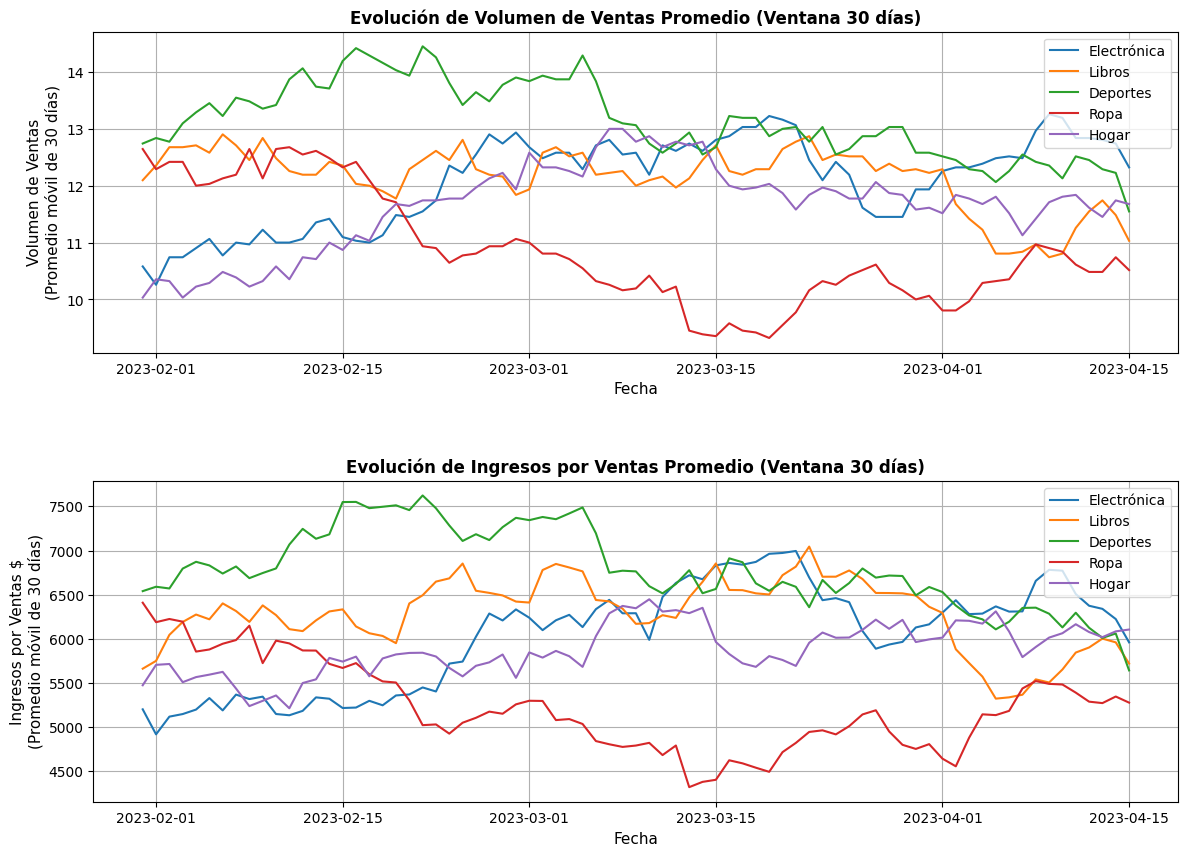

In [9]:
# Cálculo de promedio móvil a 30 días

print("\n" + "="*70)
print("ANÁLISIS CON PROMEDIO MÓVIL DE 30 DÍAS: ¿QUÉ VENDE MEJOR?")
print("="*70 + "\n")

df['fecha_dia'] = df['fecha_pedido'].dt.date

# Crear DataFrame pivote 
df_dia = df.pivot_table(
    index='fecha_dia',
    columns='categoria',
    values=['total_pedido', 'cantidad'],
    aggfunc='sum'
).fillna(0)

# Aplanar el MultiIndex
df_dia.columns = [f'{col[1]}_{col[0]}' for col in df_dia.columns]

df_dia.index = pd.to_datetime(df_dia.index)

# Crear rango completo de fechas desde primera hasta última fecha
fecha_min = df_dia.index.min()
fecha_max = df_dia.index.max()
rango_fechas_completo = pd.date_range(start=fecha_min, end=fecha_max, freq='D')

# Rellenar con 0 los datos para fechas que no estaban presentes en el dataset original
df_dia = df_dia.reindex(rango_fechas_completo, fill_value=0)
    
df_dia.sort_index(inplace=True)

# Calcular media móvil 
ventana = 30
for col in df_dia.columns:
    rolling_mean = df_dia[col].rolling(window=ventana, min_periods=ventana, closed='both').mean()
    df_dia[f'{col}_roll'] = rolling_mean.fillna(0)

df_dia.reset_index(inplace=True, names=['fecha_dia'])

df_dia = df_dia[df_dia['fecha_dia'] > fecha_min + pd.Timedelta(days=ventana-1) ]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,10))
for col in [f'{c}_cantidad_roll' for c in df.categoria.unique()]:
    label = col.split('_')[0]
    sns.lineplot(df_dia, x='fecha_dia', y=col, label=label, ax=ax1)
    ax1.set_ylabel(f'Volumen de Ventas\n(Promedio móvil de {ventana} días)', fontsize=11)
    ax1.set_xlabel('Fecha', fontsize=11)
    ax1.set_title(f'Evolución de Volumen de Ventas Promedio (Ventana {ventana} días)', fontsize=12, weight='bold')
    ax1.grid()
for col in [f'{c}_total_pedido_roll' for c in df.categoria.unique()]:
    label = col.split('_')[0]
    sns.lineplot(df_dia, x='fecha_dia', y=col, label=label, ax=ax2)
    ax2.set_ylabel(f'Ingresos por Ventas $\n(Promedio móvil de {ventana} días)', fontsize=11)
    ax2.set_xlabel('Fecha', fontsize=11)
    ax2.set_title(f'Evolución de Ingresos por Ventas Promedio (Ventana {ventana} días)', fontsize=12, weight='bold')
    ax2.grid()

plt.subplots_adjust(hspace=0.4) 
plt.show()

**Respuesta a la pregunta ¿Qué vende mejor?**  
- DEPORTES es la categoría con mayores ventas históricas según las tablas.
- Los gráficos muestran que DEPORTES lideró la media móvil de 30 días desde fines de enero hasta mediados de marzo, cuando inicia una tendencia decreciente.
- Conclusión: DEPORTES ha sido la principal fuente de ingresos, pero presenta una tendencia a la baja que requiere monitoreo.

<div style="font-weight:bold; color:#058212; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#058212; text-decoration-thickness:3px">¿Quiénes son los mejores clientes?</h3>
</div>

El análisis proporcionado usa la clasificación del dataset, pero como la asignación de clientes a pedidos fue aleatoria, no refleja las dimensiones RFM (Recency, Frequency, Monetary) necesarias para una segmentación adecuada. Usaré este método para determinar quiénes son los mejores clientes en el período completo.


**SEGMENTACIÓN RFM**

La clasificación RFM segmenta a los clientes según tres dimensiones de comportamiento de compra: recencia, frecuencia y valor monetario. Los segmentos resultantes son:
- Campeones: Compraron recientemente, lo hacen con frecuencia y generan el mayor valor monetario.
- Leales: Mantienen un gasto elevado y compran de forma regular.
- Potencialmente Leales: Clientes recientes con múltiples compras y buen valor monetario promedio.
- Nuevos: Realizaron su primera compra hace poco, pero aún no han repetido.
- Prometedores: Compradores recientes con bajo gasto inicial.
- Necesitan Atención: Superan la media en las tres métricas, pero llevan tiempo sin comprar.
- No Podemos Perderlos: Históricamente son los mejores clientes (alto gasto y frecuencia), pero están inactivos desde hace tiempo.
- A Punto de Dormir: Se encuentran por debajo de la media en todas las dimensiones.
- En Riesgo: Clientes que fueron muy valiosos (alto gasto y frecuencia) pero cuya última compra fue hace mucho tiempo.
- Hibernando: Inactivos desde hace tiempo, con historial de bajo gasto y pocas transacciones.
- Perdidos: Registran las puntuaciones más bajas en recencia, frecuencia y valor monetario.

In [10]:
# Crear perfil individual de cada cliente con método RFM

def obtener_moda(series):
    modes = series.mode()
    return modes.iloc[0] if not modes.empty else np.nan
    
cliente_profile = df.groupby('id_cliente').agg({
    'total_pedido': ['sum', 'mean', 'count'],  # compra total, compra promedio, frecuencia
    'fecha_pedido': ['min', 'max', 'nunique'], # Primera compra, última compra, días únicos
    'categoria': 'nunique',                    # Variedad de categorías
    'region': obtener_moda,                    # Región principal
    'tipo_cliente': obtener_moda,              # Segmentación asignada (no es representativa)
    'precio_unitario': 'mean',                 # Precio promedio comprado
    'cantidad': 'mean'                         # Cantidad promedio por compra
}).round(2)

# Aplanar columnas
cliente_profile.columns = [
    'monto_total', 'monto_promedio', 'frecuencia_compras',
    'primera_compra', 'ultima_compra', 'dias_compra_unicos',
    'categorias_compradas', 'region_principal', 'segmento_asignado',
    'precio_promedio', 'cantidad_promedio'
]

# suponer que el análisis se efectúa el día siguiente de la última fecha registrada en el dataset
fecha_max = fecha_max + pd.Timedelta(hours=23, minutes=59, seconds=59)
cliente_profile['antiguedad_dias'] = (fecha_max - cliente_profile['primera_compra']).dt.days + 1 
cliente_profile['recencia_dias'] = (fecha_max - cliente_profile['ultima_compra']).dt.days + 1
cliente_profile['frecuencia_promedio'] = (cliente_profile['antiguedad_dias'] / cliente_profile['frecuencia_compras']).round(1)

# Análisis RFM (Recencia, Frecuencia, Monetario)

# Calcular percentiles para RFM
labels = [1, 2, 3, 4, 5]
cliente_profile['R_score'] = pd.qcut(cliente_profile['recencia_dias'], 5, labels=labels[::-1])  
cliente_profile['F_score'] = pd.qcut(cliente_profile['frecuencia_compras'], 5, labels=labels) 
cliente_profile['M_score'] = pd.qcut(cliente_profile['monto_total'], 5, labels=labels)  

cliente_profile['RFM_score'] = (cliente_profile['R_score'].astype(str) + \
                                cliente_profile['F_score'].astype(str) + \
                                cliente_profile['M_score'].astype(str)).astype(int)


print("\n" + "-" * 70)
print("SEGMENTACIÓN DE CLIENTES MÉTODO RFM:")
print("-" * 70)
# Identificar segmentos RFM
# se usa la segmentación señalada en https://connectif.ai/blog/que-es-el-analisis-rfm-en-marketing-y-como-calcularlo/
    
segmentos = [
    ([555, 554, 544, 545, 454, 455, 445], 'Campeones'),
    ([543, 444, 435, 355, 354, 345, 344, 335], 'Leales'),
    ([553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323], 'Potencialmente Leales'),
    ([512, 511, 422, 421, 412, 411, 311], 'Nuevos'),
    ([525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413, 414, 415, 315, 314, 313], 'Prometedores'),
    ([535, 534, 443, 434, 343, 334, 325, 324], 'Necesitan Atención'),
    ([155, 154, 144, 214, 215, 115, 114, 113], 'No Podemos Perderlos'),
    ([331, 321, 312, 221, 213], 'A Punto de Dormir'),
    ([255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124], 'En Riesgo'),
    ([332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211], 'Hibernando'),
    ([111, 112, 121, 131, 141, 151], 'Perdidos')
]

# Crear el diccionario
rfm_dict = {}
for codigos, segmento in segmentos:
    for codigo in codigos:
        rfm_dict[codigo] = segmento  

cliente_profile['segmento_rfm'] = cliente_profile['RFM_score'].map(rfm_dict)

pcte_clientes = (cliente_profile['segmento_rfm'].value_counts(normalize=True).sort_values(ascending=False)*100).round(1)
print(pcte_clientes)

suma_urgencia = pcte_clientes['En Riesgo'] +\
                pcte_clientes['Necesitan Atención'] +\
                pcte_clientes['A Punto de Dormir'] +\
                pcte_clientes['No Podemos Perderlos'] 

print(f"\nClientes que requieren tomar medidas con urgencia: {suma_urgencia:.1f}% (En Riesgo, Necesitan Atención, A Punto de Dormir, No Podemos Perderlos)")

# ANÁLISIS DE LOS "MEJORES CLIENTES" (SEGMENTO RFM 555)

mejores_clientes = cliente_profile[cliente_profile['RFM_score']==555].sort_values('monto_total', ascending=False)

if len(mejores_clientes) > 0:
    print("\n" + "-" * 70)
    print("CARACTERÍSTICAS DE LOS MEJORES CLIENTES (RFM 555):")
    print("-" * 70)
    
    print(f"\nTotal de 'Mejores Clientes': {len(mejores_clientes)}")
    print(f"Porcentaje del total: {len(mejores_clientes)/len(cliente_profile):.1%}")
    
    # Análisis demográfico/comportamental de mejores clientes
    print("\nDistribución por región:")
    region_dist = mejores_clientes['region_principal'].value_counts()
    for region, count in region_dist.items():
        print(f"  - {region}: {count} clientes ({count/len(mejores_clientes):.1%})")
    
    print("\nDistribución por categorías:")
    # Obtener categorías favoritas de mejores clientes
    mejores_ids = mejores_clientes.index.tolist()
    categorias_fav = df[df['id_cliente'].isin(mejores_ids)].groupby('categoria')['total_pedido'].sum().sort_values(ascending=False)
    
    for categoria, venta in categorias_fav.items():
        print(f"  - {categoria}: ${venta:.2f}")


----------------------------------------------------------------------
SEGMENTACIÓN DE CLIENTES MÉTODO RFM:
----------------------------------------------------------------------
segmento_rfm
Hibernando               13.5
En Riesgo                12.5
Perdidos                 11.7
Campeones                11.7
Potencialmente Leales    10.9
Nuevos                   10.7
Necesitan Atención        7.9
Leales                    7.9
Prometedores              6.7
A Punto de Dormir         5.2
No Podemos Perderlos      1.4
Name: proportion, dtype: float64

Clientes que requieren tomar medidas con urgencia: 27.0% (En Riesgo, Necesitan Atención, A Punto de Dormir, No Podemos Perderlos)

----------------------------------------------------------------------
CARACTERÍSTICAS DE LOS MEJORES CLIENTES (RFM 555):
----------------------------------------------------------------------

Total de 'Mejores Clientes': 19
Porcentaje del total: 3.8%

Distribución por región:
  - Bilbao: 5 clientes (26.3%)
  

**Respuesta a la pregunta ¿Quiénes son los mejores clientes?**  
- Pertenecen al segmento RFM 555: compras recientes, frecuentes y de alto valor.
- Total: 19 clientes (3.8% de la base).
- Ubicación: concentrados en Bilbao.
- Preferencia: productos deportivos.
- Hallazgo adicional: el 27% de los clientes está en segmentos de riesgo (En Riesgo, Necesitan Atención, A Punto de Dormir, No Podemos Perder), lo que requiere acciones de retención prioritarias.

<div style="font-weight:bold; color:#058212; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#058212; text-decoration-thickness:3px">¿Cuándo ocurren las ventas?</h3>
</div>

El análisis entregado resume las ventas por día de la semana. Sugiero agregar las 3 horas con mejores y peores ventas del período completo.

In [11]:
print("\n" + "="*70)
print("ANÁLISIS: ¿CUÁNDO OCURREN LAS VENTAS?")
print("="*70)

print("\n" + "-" * 70)
print("ANÁLISIS TEMPORAL GENERAL")
print("-" * 70)

df['hora'] = df['fecha_pedido'].dt.hour
df['minuto'] = df['fecha_pedido'].dt.minute
df['es_fin_semana'] = df['dia_semana'].isin(['Saturday', 'Sunday'])  

print(f"  - Período analizado : {df['fecha_pedido'].min()} a {df['fecha_pedido'].max()}")
print(f"  - Total días con ventas: {df['fecha_pedido'].dt.date.nunique()} días")

horas_dia = df['fecha_pedido'].dt.time
hora_maxima = max(horas_dia)
hora_minima = min(horas_dia)
print(f"  - Rango de horas con ventas registradas: {hora_minima} a {hora_maxima}")

print("\n" + "-" * 70)
print("PATRONES POR DÍA DE LA SEMANA")
print("-" * 70)

ventas_diarias_semana = df.groupby('dia_semana').agg({
    'total_pedido': ['count', 'sum', 'mean'],
    'cantidad': 'sum',
    'id_cliente': 'nunique'
}).round(2)

ventas_diarias_semana.columns = ['volumen_pedidos', 'ingresos_ventas', 'boleta_promedio', 'volumen_ventas', 'clientes_unicos']

# Calcular % diferencia vs promedio
promedio_ventas_dia = ventas_diarias_semana['ingresos_ventas'].mean()
ventas_diarias_semana['ingresos_ventas_vs_promedio'] = ((ventas_diarias_semana['ingresos_ventas'] - promedio_ventas_dia) / promedio_ventas_dia * 100).round(1)
ventas_diarias_semana.sort_values('ingresos_ventas', ascending=False, inplace=True)

display(ventas_diarias_semana)

print("\n" + "-" * 70)
print("PATRONES POR HORA DEL DÍA")
print("-" * 70)

ventas_horarias = df.groupby('hora').agg({
    'total_pedido': ['count', 'sum', 'mean'],
    'cantidad': 'sum',
    'id_cliente': 'nunique'
}).round(2)

ventas_horarias.columns = ['volumen_pedidos', 'ingresos_ventas', 'boleta_promedio', 'volumen_ventas', 'clientes_unicos']

nhoras = 3

# Identificar horas con mayores ingresos por ventas
top_horas_ventas = ventas_horarias['ingresos_ventas'].nlargest(nhoras)
print(f"\nLas {nhoras} horas con mayores ingresos por ventas son:")
for hora, venta in top_horas_ventas.items():
    pedidos = ventas_horarias.loc[hora, 'volumen_pedidos']
    unidades = ventas_horarias.loc[hora, 'volumen_ventas']
    clientes = ventas_horarias.loc[hora, 'clientes_unicos']
    print(f"  - {hora:02d}:00 : ${venta:.2f} ({pedidos} pedidos - {unidades} unidades - {clientes} clientes)")

# Identificar horas con peores ingresos por ventas
baja_horas_ventas = ventas_horarias['ingresos_ventas'].nsmallest(nhoras)
print(f"\nLas {nhoras} horas con peores ingresos por ventas son:")
for hora, venta in baja_horas_ventas.items():
    pedidos = ventas_horarias.loc[hora, 'volumen_pedidos']
    unidades = ventas_horarias.loc[hora, 'volumen_ventas']
    clientes = ventas_horarias.loc[hora, 'clientes_unicos']
    print(f"  - {hora:02d}:00 : ${venta:.2f} ({pedidos} pedidos - {unidades} unidades - {clientes} clientes)")


ANÁLISIS: ¿CUÁNDO OCURREN LAS VENTAS?

----------------------------------------------------------------------
ANÁLISIS TEMPORAL GENERAL
----------------------------------------------------------------------
  - Período analizado : 2023-01-01 00:00:00 a 2023-04-15 03:00:00
  - Total días con ventas: 105 días
  - Rango de horas con ventas registradas: 00:00:00 a 23:00:00

----------------------------------------------------------------------
PATRONES POR DÍA DE LA SEMANA
----------------------------------------------------------------------


,volumen_pedidos,ingresos_ventas,boleta_promedio,volumen_ventas,clientes_unicos,ingresos_ventas_vs_promedio
dia_semana,,,,,,
Tuesday,360,470959.22,1308.22,913,257,5.6
Monday,360,452611.76,1257.25,895,254,1.4
Sunday,360,450868.25,1252.41,905,252,1.1
Friday,360,449411.17,1248.36,908,251,0.7
Wednesday,360,438142.36,1217.06,874,254,-1.8
Saturday,340,433770.68,1275.80,829,251,-2.8
Thursday,360,427274.37,1186.87,863,257,-4.2



----------------------------------------------------------------------
PATRONES POR HORA DEL DÍA
----------------------------------------------------------------------

Las 3 horas con mayores ingresos por ventas son:
  - 21:00 : $153370.84 (104 pedidos - 270 unidades - 92 clientes)
  - 14:00 : $149564.16 (104 pedidos - 270 unidades - 98 clientes)
  - 16:00 : $141150.10 (104 pedidos - 258 unidades - 89 clientes)

Las 3 horas con peores ingresos por ventas son:
  - 11:00 : $110458.65 (104 pedidos - 249 unidades - 93 clientes)
  - 20:00 : $116189.85 (104 pedidos - 245 unidades - 93 clientes)
  - 18:00 : $118784.07 (104 pedidos - 248 unidades - 91 clientes)


**Respuesta a la pregunta ¿Cuando ocurren las ventas?**  
- Los martes concentran las mayores ventas (+5.6% sobre la media), seguidos de lunes (+1.4%), domingo (+1.1%) y viernes (+0.7%).
- Las mejores horas son: 21:00, 14:00 y 16:00.
- Las peores horas son: 11:00, 20:00 y 18:00.

 <div style="font-weight:bold; color:#058212; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#058212; text-decoration-thickness:3px">¿Qué patrones requieren acción inmediata?</h3>
</div>

El análisis reveló dos prioridades críticas:
- Categoría DEPORTES en declive

    - Presenta tendencia a la baja desde mediados de marzo.
    - Acciones: Lanzar promociones dirigidas, revisar pricing, analizar competencia y evaluar mix de productos.

- 27% de clientes en segmentos de riesgo

    - Incluye clientes En Riesgo, Necesitan Atención, A Punto de Dormir y No Podemos Perder.
    - Acciones: Implementar campaña de reactivación escalonada por segmento, con cupones personalizados para "No Podemos Perder" y ofertas especiales para el resto. Realizar encuestas para identificar causas de inactividad.